In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot(thing):
    plt.imshow(thing.reshape(32,32),interpolation="nearest")
    plt.show()

In [7]:
def sign(x):
    if x >= 0:
        x = 1
    else:
        x = -1
    return x

            
class hopfield():
    def __init__(self, size, npatterns, trainX):
        self.W = np.zeros([npatterns,npatterns])
        self.size = size
        self.npatterns = npatterns
        
        x1=([-1, -1, 1, -1, 1, -1, -1, 1])
        x2=([-1, -1, -1, -1, -1, 1, -1, -1])
        x3=([-1, 1, 1, -1, -1, 1, -1, 1])
        
        self.X = trainX
    
    def calc_weights(self):
        for x in self.X:
            self.W += np.outer(x,x)
        for i in range(self.npatterns):
            self.W[i,i] = 0
#         print(self.W)
    
    def update_x(self, x, W):
#         print("len = ", len(x))
        for i in range(len(x[0])):
#             print("before ", np.dot(x,W[i,:]))
            x[0,i] = sign(np.dot(x,W[i,:]))
#             print("after", sign(np.dot(x,W[i,:])))
        return x

    def update_batch(self,x):
        new = np.dot(x,self.W)
        new[new>=0] = 1
        new[new<0] = -1
        return new
    
    def update_random(self,x):
        new = x.copy()
        n_dims = x.shape[0]
        for i in range(n_dims):
            unit = np.random.randint(0,n_dims)
            xsum = 0
            for j in range(n_dims):
                xsum += np.multiply(self.W[unit][j], new[j])
            new[unit] = sign(xsum)
            
        return new
            
    def train(self):       
        self.calc_weights()            
#         self.update_x(x,self.W)
    
    def recall(self, x, n_epochs):
        for epoch in range(n_epochs):
            x = self.update_x(x, self.W)
#             print(x)
        return x

    def recall_batch(self,x, max_iter=100):
        error = 1
        iters = 0
        
        while error > 0:
            new = self.update_batch(x)
            error = sum(abs(new-x))
            x = new.copy()
            iters = iters+1
            if(iters > max_iter):
                break
                
        print("iters: " + str(iters))
        return x
    
    def recall_random(self,x, max_iter=15):
        error = 1
        iters = 0
        
        while error > 0:
#             print(iters)
            new = self.update_random(x)
            error = sum(abs(new-x))
            x = new.copy()
            iters+=1
            if(iters > max_iter):
                break
        
        print("iters: " + str(iters))
        return x
 
 

In [8]:
def add_noise(image, percentage_flip):
    result = np.copy(image)
    n_flip = int(len(image)*percentage_flip/100)
    units = np.random.choice(len(image),n_flip,replace=False)
    for i in units:
        result[i] = -1*result[i]
    return result

def recall_accuracy(input_image,recall_image):
    correct = 0
    for i in range(len(input_image)):
        if input_image[i] == recall_image[i]:
            correct += 1
    return correct*100/len(input_image)

pictData = np.loadtxt('pict.dat',delimiter=",", dtype=int).reshape(-1,1024)
print(pictData.shape)
train_X = pictData[0:3].copy()

hopfield_net = hopfield(train_X.shape[0],train_X.shape[1],train_X)
hopfield_net.train()

(11, 1024)


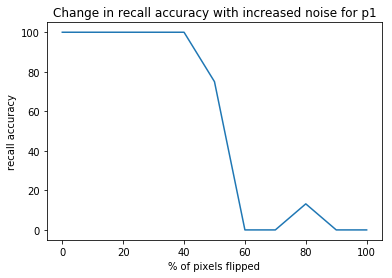

In [9]:
# checking noise for p1
c_test = train_X[0]
acc_vals = np.zeros(11)
steps = np.zeros(11)
for i in range(11):
    noisy_image = add_noise(c_test,i*10)
    test = hopfield_net.update_batch(noisy_image)
    acc_vals[i] = recall_accuracy(c_test,test)
    steps[i] = i*10
plt.plot(steps,acc_vals)
plt.xlabel('% of pixels flipped')
plt.ylabel('recall accuracy')
plt.title('Change in recall accuracy with increased noise for p1')
plt.savefig('p1_accuracu.png')

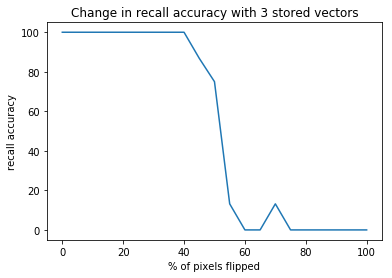

In [19]:
#train with dim
dim = 3
train_X = pictData[0:dim].copy()
c_test = train_X[0]

hopfield_net = hopfield(train_X.shape[0],train_X.shape[1],train_X)
hopfield_net.train()

acc_vals = []
steps = []
for i in range(21):
    noisy_image = add_noise(c_test,i*5)
    test = hopfield_net.update_batch(noisy_image)
    acc_vals.append(recall_accuracy(c_test,test))
    steps.append(i*5)
    
plt.plot(steps,acc_vals)
plt.xlabel('% of pixels flipped')
plt.ylabel('recall accuracy')
plt.title('Change in recall accuracy with ' + str(dim) + ' stored vectors')
plt.savefig('p1_accuracu.png')

In [20]:
def gen_random_data(dim):
    train_X = np.random.randn(dim,1024)
    train_X[train_X > 0] = 1
    train_X[train_X <= 0] = -1
    return train_X

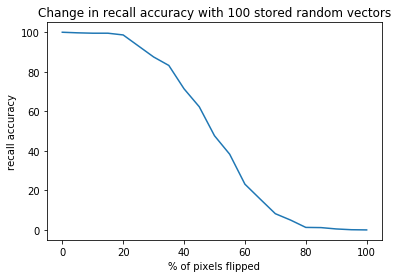

In [24]:
#train with random data
dim = 100
train_X = gen_random_data(dim)
c_test = train_X[0]

hopfield_net = hopfield(train_X.shape[0],train_X.shape[1],train_X)
hopfield_net.train()

acc_vals = []
steps = []
for i in range(21):
    noisy_image = add_noise(c_test,i*5)
    test = hopfield_net.update_batch(noisy_image)
    acc_vals.append(recall_accuracy(c_test,test))
    steps.append(i*5)
    
plt.plot(steps,acc_vals)
plt.xlabel('% of pixels flipped')
plt.ylabel('recall accuracy')
plt.title('Change in recall accuracy with ' + str(dim) + ' stored random vectors')
plt.savefig('p1_accuracu.png')